<div style="background-color: lightgreen; padding: 10px; font-weight: bold; font-size: 30px">
Project 1 - Bank Customer Churn Prediction
<div

Customer churn refers to the phenomenon wherein customers discontinue their relationship with a business, in this case, a bank. It is a critical concern for banks and other businesses since retaining existing customers is often more cost-effective than acquiring new ones. The objective of this project is to develop and test multiple machine-learning algorithms that aim to predict, based on various features, whether a customer will choose to leave the bank or not.
The model is build as follows:

> - **Y - Exit**. - *Whether or not the customer left the bank.*
>
>- **X<sub>1</sub> - CreditScore**. *Numerical representation of a customer's credit creditworthiness. Customers with varying credit scores might have different financial profiles that could influence their decisions regarding continued service usage.*
>
>- **X<sub>2</sub> - Geography**. *Geographic location might influence customer behavior. Factors such as economic conditions, competition, and cultural differences could play a role in whether customers decide to churn.*
>
> - **X<sub>3</sub> - Gender**. *Gender might have some influence on churn, as certain genders might have different preferences, needs, or reasons for discontinuing a service.*
>
> - **X<sub>4</sub> - Age**. *Age can play a significant role in churn. Younger customers might churn due to changing life circumstances, while older customers might leave due to retirement or changing needs.*
>
> - **X<sub>5</sub> - Tenure**. *Tenure is the length of time a customer has been with the institution, is a strong indicator of churn. Newer customers might be more likely to churn than long-term ones who have established relationships.*
>
> - **X<sub>6</sub> - Balance**. *A higher balance might indicate financial stability, reducing the likelihood of churn. However, extremely high balances could also indicate a lack of engagement with the institution's services.*
>
> - **X<sub>7</sub> - NumOfProducts**. *HCustomers with more products might be more engaged, but they could also be more susceptible to churn if they encounter issues with multiple products.*
>
> - **X<sub>8</sub> - HasCrCard**. *Having a credit card might not be a strong indicator of churn by itself, but it could be considered along with other features to understand the overall customer profile.*
>
> - **X<sub>9</sub> - IsActiveMember**. *Inactive members are more likely to churn since they are not actively engaging with the institution's offerings.*
>
> - **X<sub>10</sub> - EstimatedSalary**. *A higher estimated salary might suggest greater financial stability and reduce the likelihood of churn. However, other factors can influence churn decisions.*

The Machine-Learning algorithms tested are:
<ul style="list-style-type: none;">
    <li><span style="color: green; font-size: larger;">✅</span> K-Nearest Neighbors</li>
    <li><span style="color: green; font-size: larger;">✅</span> Naive Bayes</li>
    <li><span style="color: green; font-size: larger;">✅</span> Support Vector Machines</li>
    <li><span style="color: green; font-size: larger;">✅</span> Decision Tree</li>
    <li><span style="color: green; font-size: larger;">✅</span> Random Forest</li>
    <li><span style="color: green; font-size: larger;">✅</span> K-means (clustering)</li>
    <li><span style="color: green; font-size: larger;">✅</span> Logistic Regression</li>
</ul>

Dataset: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction?select=Churn_Modelling.csv

<div style="background-color: lightgreen; padding: 10px; font-weight: bold; font-size: 20px">
Data Exploration
</div>

Importing Libraries

In [1]:
# Data Manipulation and Analysis Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Bank Customer Churn Prediction Dataset into a pandas dataframe

In [2]:
churning = pd.read_csv('https://raw.githubusercontent.com/AlessandroSciorilli/MachineLearning_Bank_Customer_Churn_Prediction/main/Bank_Customer_Churn.csv')

Displaying the first few rows of the dataset

In [3]:
churning.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Checking the shape of the dataset

In [4]:
churning.shape

(10000, 14)

Checking the features in the dataframe

In [5]:
churning.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Checking for missing data - Luckily, there is no missing data!

In [6]:
churning.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Removing the columns **RowNumber**, **CustomerId**, and **Surname** from the dataframe. They are all unique identifiers, not relevant to the analysis.

In [7]:
churning.drop(columns=['RowNumber', 'CustomerId','Surname'], inplace=True)

Converting the values of the label **Exited** from numerical to categorical for greater clarity.
**0** will be represented as **No**, and **1** will be represented as **Yes**.

In [8]:
churning['Exited'] = churning['Exited'].replace({0: 'No', 1: 'Yes'})

<div style="background-color: lightgreen; padding: 10px; font-weight: bold; font-size: 20px">
Data Visualization
</div>

### Plot 1 - Count of Exits

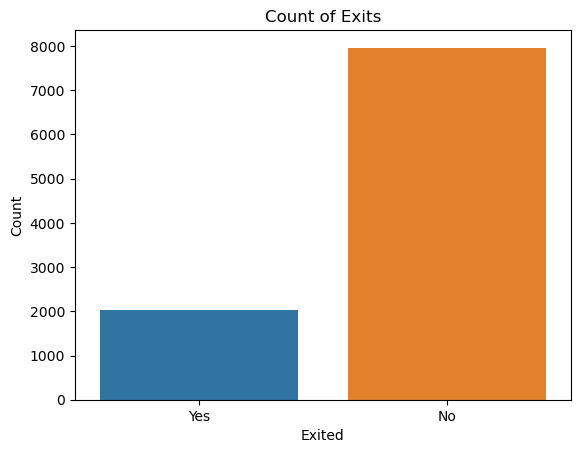

In [9]:
sns.countplot(data=churning, x='Exited')
sns.set_palette("deep")
plt.title('Count of Exits')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

### Plot 2 -  Proportion of Exited Customers by Country

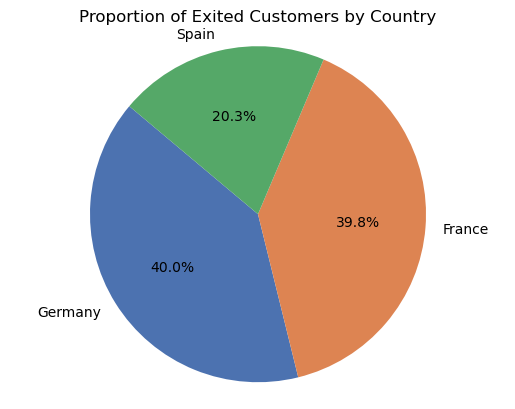

In [10]:
country_counts = churning[churning['Exited'] == 'Yes']['Geography'].value_counts()
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportion of Exited Customers by Country')
plt.show()

### Plot 3 - Proportion of Exited Customers by Gender, Credit Card Possession and Active Member Status

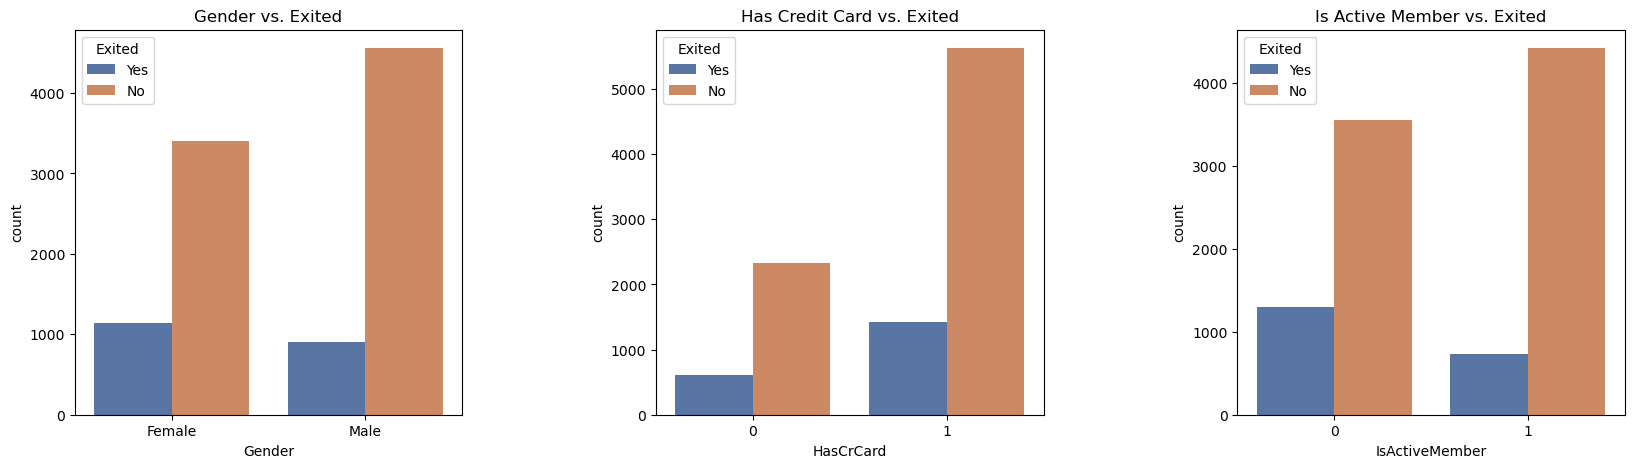

In [11]:
# Setting up subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plt.subplots_adjust(wspace=0.5)  # Corrected spacing adjustment
sns.set_palette("deep")

#Countplot Exited VS Gender
sns.countplot(x='Gender', hue='Exited', data=churning, ax=axes[0])
axes[0].set_title('Gender vs. Exited')

#Countplot HasCrCard VS Gender
sns.countplot(x='HasCrCard', hue='Exited', data=churning, ax=axes[1])
axes[1].set_title('Has Credit Card vs. Exited')

#Countplot IsActiveMember VS Gender
sns.countplot(x='IsActiveMember', hue='Exited', data=churning, ax=axes[2])
axes[2].set_title('Is Active Member vs. Exited')

plt.show()


### Plot 4 - Age Distribution by Exited Status

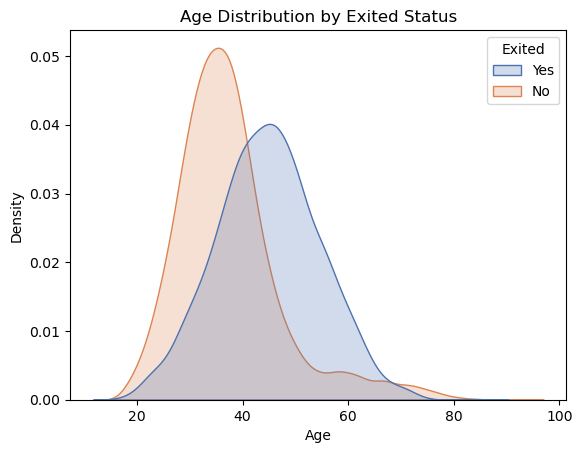

In [12]:
sns.kdeplot(data=churning, x='Age', hue='Exited',common_norm=False, fill=True)
plt.title('Age Distribution by Exited Status')
plt.show()

### Plot 5 - Boxplot of Balance by Exited Status

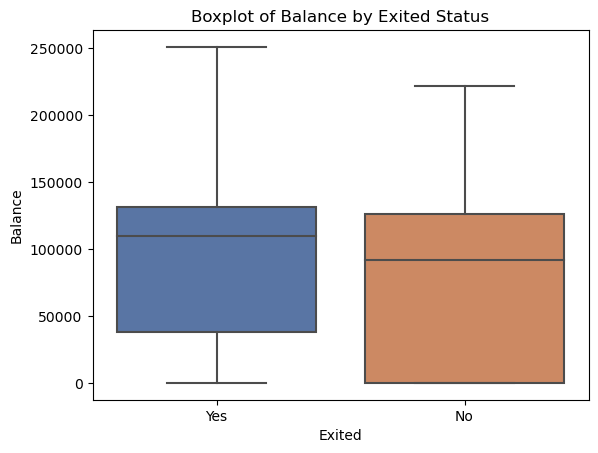

In [13]:
sns.boxplot(x='Exited', y='Balance', data=churning)
sns.set_palette("deep")
plt.title('Boxplot of Balance by Exited Status')
plt.show()

### Plot 6 - Tenure vs. Number of Exits

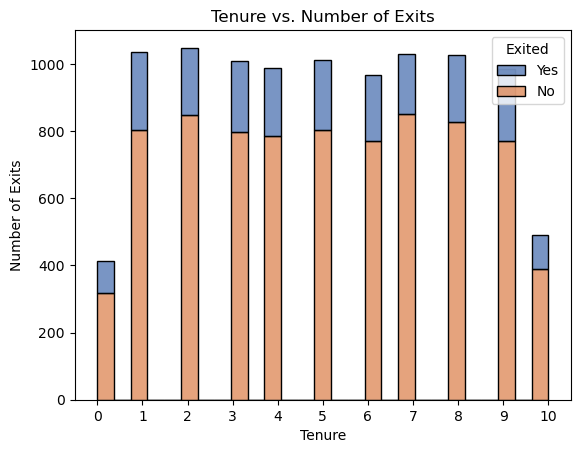

In [14]:
sns.histplot(data=churning, x='Tenure', hue='Exited', multiple='stack')
plt.title('Tenure vs. Number of Exits')
plt.xlabel('Tenure')
plt.ylabel('Number of Exits')
plt.xticks(range(0, 11))
plt.show()

### Plot 7 - Violin Plot of CreditScore by Exited 

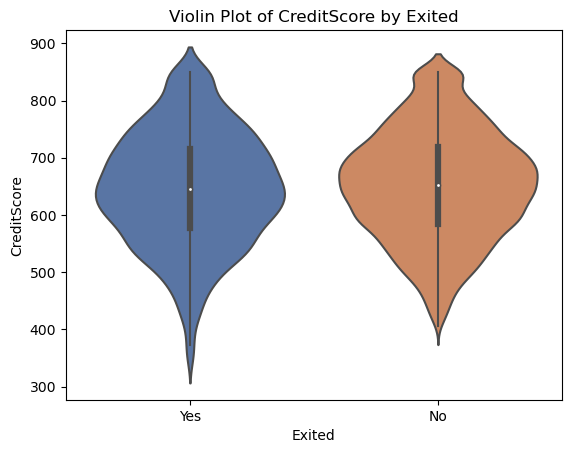

In [15]:
sns.violinplot(x='Exited', y='CreditScore', data=churning)
plt.title('Violin Plot of CreditScore by Exited')
plt.xlabel('Exited')
plt.ylabel('CreditScore')
plt.show()

### Plot 8 - Exits per Number Of Products Purchased

Text(0, 0.5, 'Number of Exits')

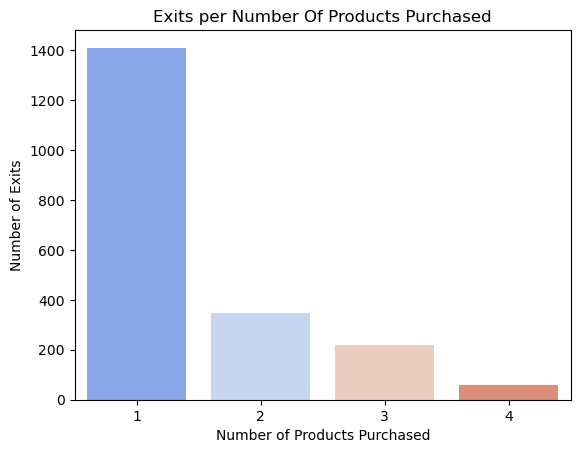

In [16]:
grouped = churning[churning['Exited'] == 'Yes'].groupby('NumOfProducts').size().reset_index(name='Count')
sns.barplot(data=grouped, x='NumOfProducts', y='Count', palette='coolwarm')
plt.title('Exits per Number Of Products Purchased')
plt.xlabel('Number of Products Purchased')
plt.ylabel('Number of Exits')

<div style="background-color: lightgreen; padding: 10px; font-weight: bold; font-size: 20px">
Data Preprocessing
</div>

Inspecting what data types are stored in the dataframe: there are 2 floats, 7 integers and 2 strings. The two strings are the features **Geography** and **Gender**

In [17]:
churning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


Checking the distribution of categorical data for the feature **Geography**

In [18]:
print(churning.Geography.value_counts())

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


Checking the distribution of categorical data for the feature **Gender**.

In [19]:
print(churning.Gender.value_counts())

Male      5457
Female    4543
Name: Gender, dtype: int64


Performing One Hot Encoding on both categorical variables (**Geography** and **Gender**)

In [20]:
geography_encoded = pd.get_dummies(churning['Geography'])
gender_encoded = pd.get_dummies(churning['Gender'])

Remove **Geography** and **Gender** from the dataframe

In [21]:
churning = churning.drop(['Geography', 'Gender'], axis = 1)

Concatenating the encoded values to the dataframe and printing the cleaned dataframe

In [22]:
churning = pd.concat([churning, geography_encoded, gender_encoded], axis=1)
churning

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,Yes,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,No,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,Yes,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,No,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,No,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,No,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,No,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,Yes,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,Yes,0,1,0,0,1


### Plot 9 - Correlation Matrix

C:\Users\aless\AppData\Local\Temp\ipykernel_12920\2008614388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = churning.corr()


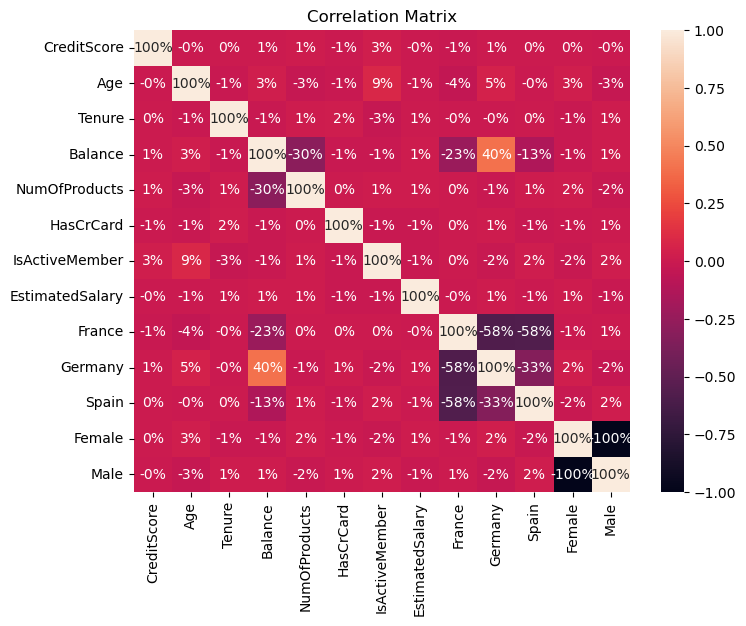

In [23]:
corr_matrix = churning.corr()
plt.figure(figsize=(8, 6)) 
sns.heatmap(corr_matrix, annot=True, fmt='.0%')
plt.title('Correlation Matrix')
plt.show()

Checking the distribution of categorical data for the label Exit

In [24]:
print(churning.Exited.value_counts())

No     7963
Yes    2037
Name: Exited, dtype: int64


Resizing the dataset by Setting a semple size of 2000

In [25]:
Samplesize = 2000      

churning = churning.groupby('Exited', as_index=False).apply(lambda array: array.loc[np.random.choice(array.index, Samplesize, False),:])


### Plot 10 - Count of Exits with Rebalanced Dataset

Text(0, 0.5, 'Count')

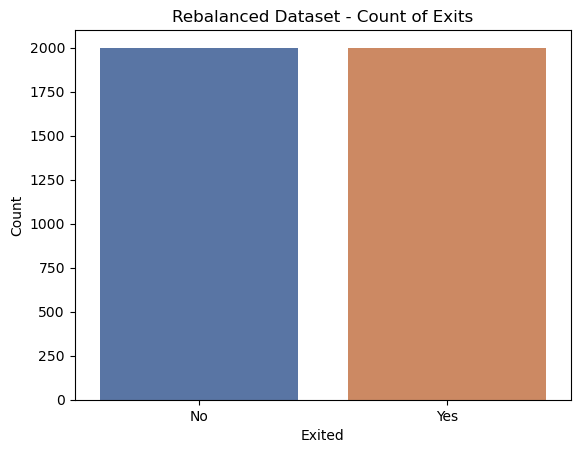

In [26]:
sns.countplot(data=churning, x='Exited')
plt.title('Rebalanced Dataset - Count of Exits')
plt.xlabel('Exited')
plt.ylabel('Count')


Separating data into features (X) and label (y)

In [27]:
#Creating a list of the features
X_headers = [col for col in churning.columns if col != 'Exited']

#Separating features (X) from the label (y)
# .values is used to extract the dataframe values to a np array
X = churning[X_headers].values
y = churning['Exited'].values

Splitting the Dataset into Training and Test Sets in the ratio 70/30

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Rescaling the features with Standardization method

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<div style="background-color: lightgreen; padding: 10px; font-weight: bold; font-size: 20px">
1. K-NEAREST NEIGHBORS (KNN)
</div>

Checking and plotting how the value of accuracy change in relation to k. Based on the chart below,  I choose k = 7

### Plot 11 - K-Value vs Accuracy 

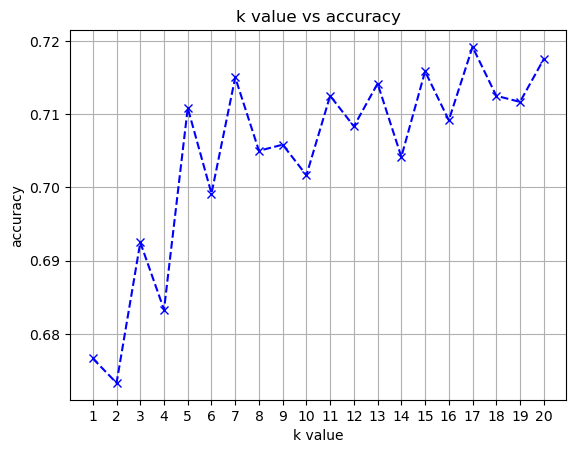

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train.ravel())
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred.ravel()))

plt.plot(list(range(1, 21)), accuracy, color='blue', linestyle='dashed', marker='x')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.title('k value vs accuracy')

plt.xticks(range(1, 21))

# Enable grid
plt.grid(True)

plt.show()

Fitting (Training) the KNN model to the training dataset

In [31]:
knn = KNeighborsClassifier(n_neighbors=19) 
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=19)

Performing 5-Fold Cross Validation

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits=k)

knn_cv_result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{knn_cv_result.mean()}')

 Avg accuracy:0.7039285714285715


Predicting the Test set results

In [33]:
y_pred_knn = knn.predict(X_test)

Getting a set of the Predicted probabilities

In [34]:
probs_y_knn= knn.predict_proba(X_test)

Generating a dataframe showing the **actual** records, the **predicted** output from the model and the corresponding **probabilities**

In [35]:
#Creating the probability dataframe
probability_knn = pd.DataFrame(probs_y_knn * 100 , columns =[['No (%)', 'Yes (%)',]])

#Creating a dataframe with the predictions
y_pred_knn_df = pd.DataFrame(y_pred_knn, columns = [['y_pred']])

#Creating a dataframe with the acutal values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']])

#Creating a dataframe with the actual values, the predicted values, and the probabilites which such predictions were made
knn_comparison_of_true_pred = pd.concat([y_test_df, y_pred_knn_df, probability_knn], axis = 1)

In the dataframe below, **y_test** represents the **actual** records, **y_pred** represents the **predicted** records from the model, and the other columns represent the **probabilites** of the predictions for the **KNN Model**

In [36]:
knn_comparison_of_true_pred

,y_test,y_pred,No (%),Yes (%)
0,Yes,No,52.631579,47.368421
1,No,No,63.157895,36.842105
2,Yes,Yes,0.000000,100.000000
3,Yes,Yes,42.105263,57.894737
4,No,No,63.157895,36.842105
...,...,...,...,...
1195,Yes,Yes,42.105263,57.894737
1196,Yes,No,68.421053,31.578947
1197,Yes,Yes,36.842105,63.157895
1198,No,Yes,47.368421,52.631579


Generating a **confusion matrix**

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn)
print (cm)

[[442 159]
 [187 412]]


### Plot 12 - Confusion Matrix for KNN

<Axes: title={'center': 'KNN - Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

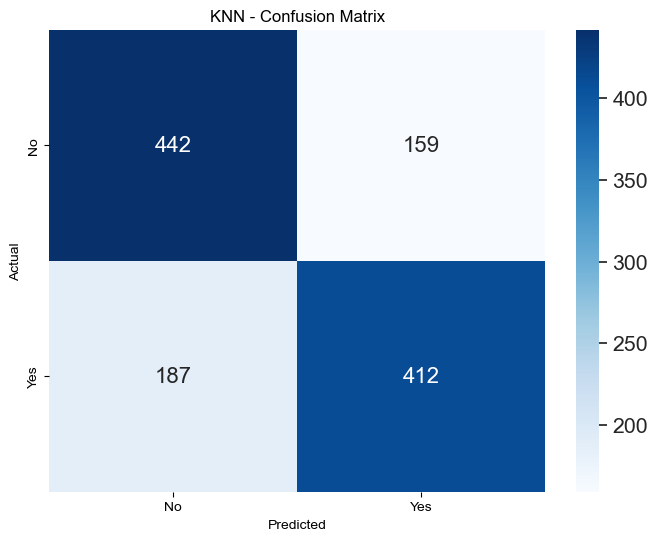

In [38]:
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,6))
plt.title('KNN - Confusion Matrix')
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

Printing the **classification report** for KNN

In [39]:
from sklearn.metrics import classification_report

knn_cr = classification_report(y_test, y_pred_knn)
print(knn_cr)

              precision    recall  f1-score   support

          No       0.70      0.74      0.72       601
         Yes       0.72      0.69      0.70       599

    accuracy                           0.71      1200
   macro avg       0.71      0.71      0.71      1200
weighted avg       0.71      0.71      0.71      1200



<div style="background-color: lightgreen; padding: 10px; font-weight: bold; font-size: 20px">
2. NAIVE BAYES
</div>

Fitting (Training) the Naive Bayes model to the training dataset. I use a **Bernoulli distribution** since it performs better with binary features (Yes/No).

In [40]:
from sklearn.naive_bayes import BernoulliNB

#Utilizing a Bernoulli Distribution  for the Naive Bayes classifier hence I choose the GaussianNB model
bnb = BernoulliNB()
bnb.fit(X_train, y_train.ravel())

BernoulliNB()

Performing 5-Fold Cross Validation

In [41]:
k = 5
kf = KFold(n_splits=k)

nb_cv_result = cross_val_score(bnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{nb_cv_result.mean()}')

 Avg accuracy:0.7071428571428571


Predicting the Test set results

In [42]:
y_pred_bnb = bnb.predict(X_test)

Getting a set of the Predicted probabilities

In [43]:
probs_y_bnb = bnb.predict_proba(X_test)

Generating a dataframe showing the **actual** records, the **predicted** output from the model and the corresponding **probabilities**

In [44]:
#Creating the probability dataframe
probability_bnb = pd.DataFrame(probs_y_bnb * 100 , columns =[['No (%)', 'Yes (%)',]])

#Creating a dataframe with the predictions
y_pred_bnb_df = pd.DataFrame(y_pred_bnb, columns = [['y_pred']])

#Creating a dataframe with the acutal values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']])

#Creating a dataframe with the actual values, the predicted values, and the probabilites which such predictions were made
nb_comparison_of_true_pred = pd.concat([y_test_df, y_pred_bnb_df, probability_bnb], axis = 1)

In the dataframe below, **y_test** represents the **actual** records, **y_pred** represents the **predicted** records from the model, and the other columns represent the **probabilites** of the predictions for the **Naive Bayes Model**

In [45]:
nb_comparison_of_true_pred

,y_test,y_pred,No (%),Yes (%)
0,Yes,Yes,33.452736,66.547264
1,No,Yes,41.826839,58.173161
2,Yes,Yes,2.758552,97.241448
3,Yes,Yes,15.408102,84.591898
4,No,No,54.523786,45.476214
...,...,...,...,...
1195,Yes,No,68.205251,31.794749
1196,Yes,No,51.750161,48.249839
1197,Yes,Yes,10.895173,89.104827
1198,No,No,58.867210,41.132790


Generating a **confusion matrix**

In [46]:
cm = confusion_matrix(y_test, y_pred_bnb)
print (cm)

[[416 185]
 [169 430]]


### Plot 13 - Confusion Matrix for Naive Bayes

<Axes: title={'center': 'Naive Bayes - Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

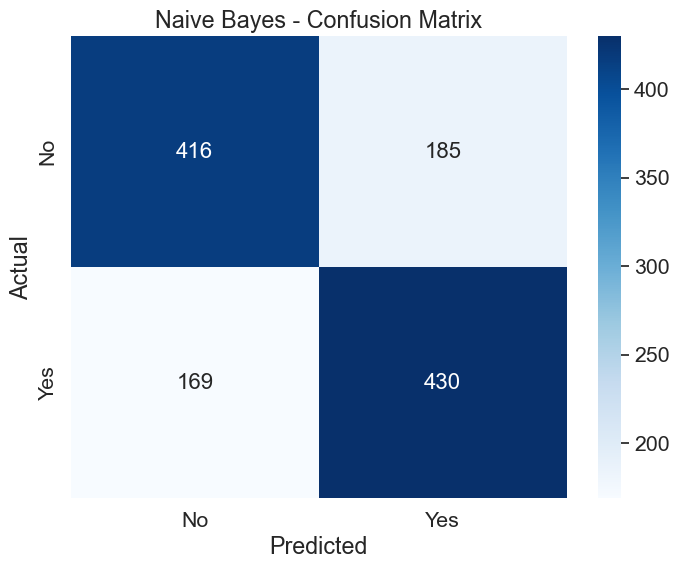

In [47]:
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,6))
plt.title('Naive Bayes - Confusion Matrix')
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

Printing the **classification report** for Naive Bayes

In [48]:
nb_cr = classification_report(y_test, y_pred_bnb)
print (nb_cr)

              precision    recall  f1-score   support

          No       0.71      0.69      0.70       601
         Yes       0.70      0.72      0.71       599

    accuracy                           0.70      1200
   macro avg       0.71      0.71      0.70      1200
weighted avg       0.71      0.70      0.70      1200



<div style="background-color: lightgreen; padding: 10px; font-weight: bold; font-size: 20px">
3. SUPPORT VECTOR MACHINES (SVM)
</div>

Creating Support Vector Machine Models using the following kernels: **Linear**, **Radial Basis Function (RBF)**, **Polynomial** and **Sigmoid (Hyperbolic Tangent)**

In [49]:
from sklearn import svm
linear_svm = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
rbf_svm = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
poly_svm = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
sig_svm = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())

Performing 5-Fold Cross Validation for each SVM model 

In [50]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

#5-Fold Cross Validation - Linear
linear_scores = cross_val_score(linear_svm, X_train, y_train, scoring='accuracy', cv=cv)
print(f'Linear Svm CV Accuracy: {linear_scores.mean()}')

#5-Fold Cross Validation - RBF
rbf_scores = cross_val_score(rbf_svm, X_train, y_train, scoring='accuracy', cv=cv)
print(f'RBF Svm CV Accuracy: {rbf_scores.mean()}')

#5-Fold Cross Validation - Polynomial
poly_scores = cross_val_score(poly_svm, X_train, y_train, scoring='accuracy', cv=cv)
print(f'Poly Svm CV Accuracy: {poly_scores.mean()}')

#5-Fold Cross Validation - Sigmoid
sig_scores = cross_val_score(sig_svm, X_train, y_train, scoring='accuracy', cv=cv)
print(f'Sig Svm CV Accuracy: {sig_scores.mean()}')

Linear Svm CV Accuracy: 0.7135714285714286
RBF Svm CV Accuracy: 0.7082142857142858
Poly Svm CV Accuracy: 0.7592857142857142
Sig Svm CV Accuracy: 0.5989285714285714


Predicting the Test set results using each SVM model on the test data

In [51]:
linear_pred = linear_svm.predict(X_test)
rbf_pred = rbf_svm.predict(X_test)
poly_pred = poly_svm.predict(X_test)
sig_pred = sig_svm.predict(X_test)

Calculating and printing accuracy scores for each SVM model on the test data

In [52]:
print('\033[1m\033[4m' + 'SVM Models - Accuracy Comparison'  + '\033[0m')
accuracy_lin = linear_svm.score(X_test, y_test)
print(f'Accuracy Linear Kernel: {accuracy_lin * 100}')
accuracy_rbf = rbf_svm.score(X_test, y_test)
print(f'Accuracy Radial Basis Kernel: {accuracy_rbf * 100}')
accuracy_poly = poly_svm.score(X_test, y_test)
print(f'Accuracy Polynomial Kernel: {accuracy_poly * 100}')
accuracy_sig = sig_svm.score(X_test, y_test)
print(f'Accuracy Sigmoid Kernel: {accuracy_sig * 100}')

SVM Models - Accuracy Comparison
Accuracy Linear Kernel: 70.83333333333334
Accuracy Radial Basis Kernel: 70.83333333333334
Accuracy Polynomial Kernel: 75.16666666666667
Accuracy Sigmoid Kernel: 59.166666666666664


Classsification report for Linear Kernel

In [53]:
svm_linear_cr = classification_report(y_test, linear_pred)
print(svm_linear_cr)

              precision    recall  f1-score   support

          No       0.71      0.71      0.71       601
         Yes       0.71      0.71      0.71       599

    accuracy                           0.71      1200
   macro avg       0.71      0.71      0.71      1200
weighted avg       0.71      0.71      0.71      1200



Classsification report for Radial Basis Kernel

In [54]:
svm_rbf_cr = classification_report(y_test, rbf_pred)
print(svm_rbf_cr)

              precision    recall  f1-score   support

          No       0.74      0.65      0.69       601
         Yes       0.68      0.77      0.72       599

    accuracy                           0.71      1200
   macro avg       0.71      0.71      0.71      1200
weighted avg       0.71      0.71      0.71      1200



 Classsification report for Polynomial Kernel

In [55]:
svm_poly_cr = classification_report(y_test, poly_pred)
print (svm_poly_cr)

              precision    recall  f1-score   support

          No       0.74      0.79      0.76       601
         Yes       0.77      0.72      0.74       599

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



Classsification report for Sigmoid Kernel

In [56]:
svm_sig_cr = classification_report(y_test, sig_pred)
print(svm_sig_cr)

              precision    recall  f1-score   support

          No       0.59      0.62      0.60       601
         Yes       0.60      0.56      0.58       599

    accuracy                           0.59      1200
   macro avg       0.59      0.59      0.59      1200
weighted avg       0.59      0.59      0.59      1200



**Polynomial** Kernel is the best performer, with an accuracy score of 85.83%

<div style="background-color: lightgreen; padding: 10px; font-weight: bold; font-size: 20px">
4. DECISION TREE
</div>

Creating and Training the Decision Tree classifier model

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=15)

Performing 5-Fold Cross Validation

In [58]:
k = 5
kf = KFold(n_splits=k)
dt_cv_result = cross_val_score(dt, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{dt_cv_result.mean()}')

 Avg accuracy:0.7046428571428571


Getting the Parameters of the Decision Tree

In [59]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 15,
 'splitter': 'best'}

Predicting the Test set results

In [60]:
y_pred_dt = dt.predict(X_test)

Getting a set of the Predicted probabilities

In [61]:
probs_y_dt = dt.predict_proba(X_test)

Generating a dataframe showing the **actual** records, the **predicted** output from the model and the corresponding **probabilities**

In [62]:
#Creating the probability dataframe
probability_dt = pd.DataFrame(probs_y_dt * 100 , columns =[['No (%)', 'Yes (%)',]])

#Creating a dataframe with the predictions
y_pred_dt_df = pd.DataFrame(y_pred_dt, columns = [['y_pred']])

#Creating a dataframe with the acutal values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']])

#Creating a dataframe with the actual values, the predicted values, and the probabilites which such predictions were made
dt_comparison_of_true_pred = pd.concat([y_test_df, y_pred_dt_df, probability_dt], axis = 1)

In the dataframe below, **y_test** represents the **actual** records, **y_pred** represents the **predicted** records from the model, and the other columns represent the **probabilites** of the predictions for the **Decision Tree Model**

In [63]:
dt_comparison_of_true_pred

,y_test,y_pred,No (%),Yes (%)
0,Yes,No,100.0,0.0
1,No,No,100.0,0.0
2,Yes,Yes,0.0,100.0
3,Yes,Yes,0.0,100.0
4,No,No,100.0,0.0
...,...,...,...,...
1195,Yes,No,100.0,0.0
1196,Yes,Yes,0.0,100.0
1197,Yes,Yes,0.0,100.0
1198,No,No,100.0,0.0


Generating a **confusion matrix**

In [64]:
cm = confusion_matrix(y_test, y_pred_dt)
print (cm)

[[423 178]
 [188 411]]


### Plot 14 - Confusion Matrix for Decision Tree 

<Axes: title={'center': 'Decision Tree - Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

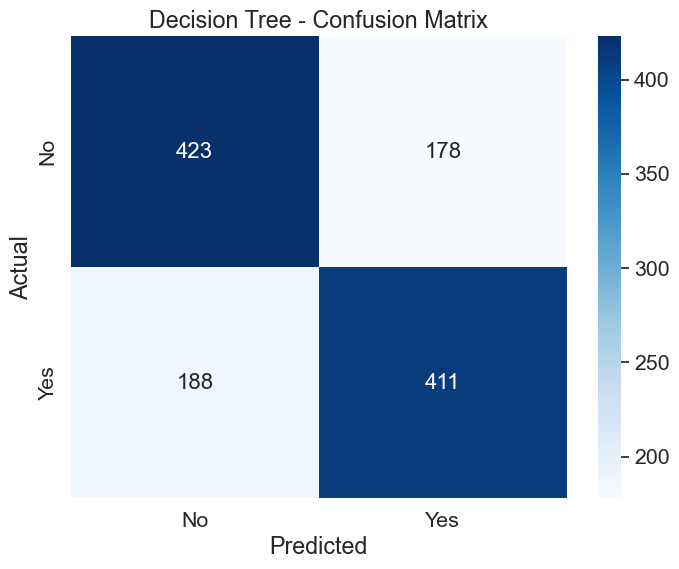

In [65]:
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,6))
plt.title('Decision Tree - Confusion Matrix')
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

Printing the **classification report** for the Decision Tree

In [66]:
dt_cr = classification_report(y_test, y_pred_dt)
print (dt_cr)

              precision    recall  f1-score   support

          No       0.69      0.70      0.70       601
         Yes       0.70      0.69      0.69       599

    accuracy                           0.69      1200
   macro avg       0.70      0.69      0.69      1200
weighted avg       0.70      0.69      0.69      1200



**Checking which feature has more impact in determining the exit of a customer**

Getting the coefficients of the different features

In [67]:
dt.feature_importances_

array([0.11820018, 0.2721663 , 0.0780029 , 0.1457001 , 0.13891365,
       0.01143282, 0.03670128, 0.1295543 , 0.00667097, 0.02701298,
       0.01219731, 0.00749101, 0.01595619])

Storing the column names in a variable

In [68]:
feature_names = churning[[col for col in churning.columns if col != 'Exited']]

Building a dataframe with the features and their corresponding rank

In [69]:
feature_importance = pd.DataFrame(dt.feature_importances_, index = feature_names.columns).sort_values(0,ascending=False)

The **Age** feature is considered the most important

In [70]:
feature_importance

,0
Age,0.272166
Balance,0.145700
NumOfProducts,0.138914
EstimatedSalary,0.129554
CreditScore,0.118200
Tenure,0.078003
IsActiveMember,0.036701
Germany,0.027013
Male,0.015956
Spain,0.012197


### Plot 15 - Bar Plot Depicting Feature Importance

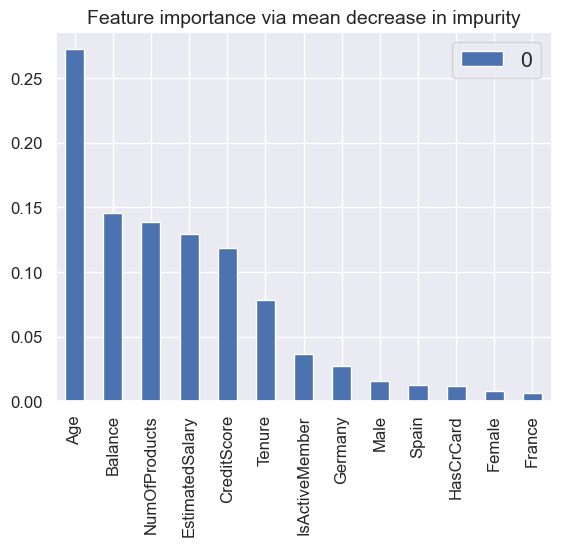

In [71]:
feature_importance.plot(kind='bar', fontsize=12)
plt.title('Feature importance via mean decrease in impurity', fontsize=14)
plt.show()

<div style="background-color: lightgreen; padding: 10px; font-weight: bold; font-size: 20px">
5. RANDOM FOREST
</div>

Creating and Training the Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=15)
rf.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=15)

Performing 5-Fold Cross Validation

In [73]:
rf_cv_result = cross_val_score(rf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{rf_cv_result.mean()}')

 Avg accuracy:0.7696428571428572


Getting the Parameters of the Random Forest

In [74]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 15,
 'verbose': 0,
 'warm_start': False}

Predicting the Test set results

In [75]:
y_pred_rf = rf.predict(X_test)

Getting a set of the Predicted probabilities

In [76]:
probs_y_rf = rf.predict_proba(X_test)

Generating a dataframe showing the **actual** records, the **predicted** output from the model and the corresponding **probabilities**

In [77]:
#Creating the probability dataframe
probability_rf = pd.DataFrame(probs_y_rf * 100 , columns =[['No (%)', 'Yes (%)',]])

#Creating a dataframe with the predictions
y_pred_rf_df = pd.DataFrame(y_pred_rf, columns = [['y_pred']])

#Creating a dataframe with the acutal values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']])

#Creating a dataframe with the actual values, the predicted values, and the probabilites which such predictions were made
rf_comparison_of_true_pred = pd.concat([y_test_df, y_pred_rf_df, probability_rf], axis = 1)

In the dataframe below, **y_test** represents the **actual** records, **y_pred** represents the **predicted** records from the model, and the other columns represent the **probabilites** of the predictions for the **Random Forest**


In [78]:
rf_comparison_of_true_pred

,y_test,y_pred,No (%),Yes (%)
0,Yes,No,62.0,38.0
1,No,No,68.0,32.0
2,Yes,Yes,1.0,99.0
3,Yes,Yes,34.0,66.0
4,No,No,70.0,30.0
...,...,...,...,...
1195,Yes,No,82.0,18.0
1196,Yes,Yes,9.0,91.0
1197,Yes,Yes,24.0,76.0
1198,No,No,75.0,25.0


Generating a confusion matrix

In [79]:
cm = confusion_matrix(y_test, y_pred_rf)
print (cm)

[[465 136]
 [155 444]]


### Plot 16 - Confusion Matrix for the Random Forest

<Axes: title={'center': 'Random Forest - Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

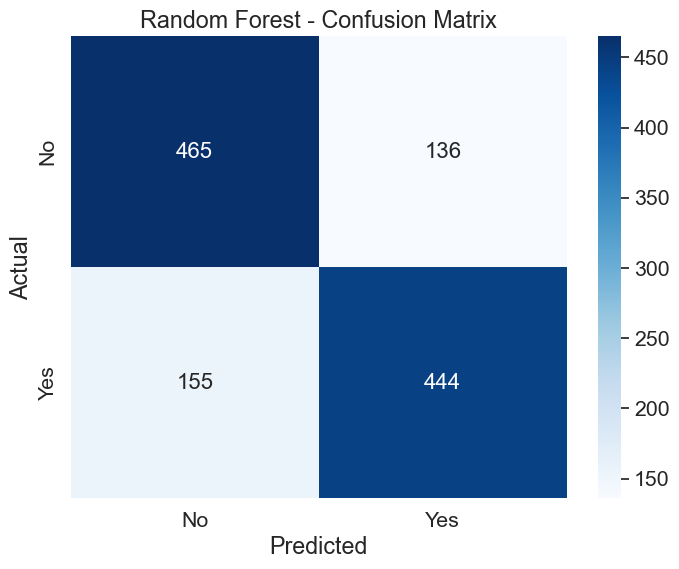

In [80]:
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,6))
plt.title('Random Forest - Confusion Matrix')
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

Printing the **classification report** for the Random Forest

In [81]:
rf_cr = classification_report(y_test, y_pred_rf)
print(rf_cr)

              precision    recall  f1-score   support

          No       0.75      0.77      0.76       601
         Yes       0.77      0.74      0.75       599

    accuracy                           0.76      1200
   macro avg       0.76      0.76      0.76      1200
weighted avg       0.76      0.76      0.76      1200



Cheking feature importance via a Random Forest

In [82]:
feature_importance = pd.DataFrame(rf.feature_importances_, index = feature_names.columns).sort_values(0,ascending=False)
feature_importance

,0
Age,0.255664
Balance,0.133314
EstimatedSalary,0.131794
CreditScore,0.130218
NumOfProducts,0.128374
Tenure,0.085305
IsActiveMember,0.036814
Germany,0.028455
HasCrCard,0.019367
France,0.013884


While **Age** remains the most important feature, **Credit Score** jumps at second position, above **EstimatedSalary** and **Balance**.

<div style="background-color: lightgreen; padding: 10px; font-weight: bold; font-size: 20px">
6. LOGISTIC REGRESSION
</div>

Creating and Training the Logistic Regression Model

In [83]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
classifier = LogisticRegression()
#Note the use of .vales and .ravel() 
#.values is used to extract the dataframe values to a numpy array

#ravel() is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
#The returned array has the same data type as the source array or input array.
classifier.fit(X_train, y_train.ravel())

LogisticRegression()

Performing 5-Fold Cross Validation

In [84]:
k = 5
kf = KFold(n_splits=k)
logit_cv_result = cross_val_score(classifier, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{logit_cv_result.mean()}')

 Avg accuracy:0.7057142857142857


Predicting the Test set results

In [85]:
y_pred_logit = classifier.predict(X_test)

Getting a set of the Predicted probabilities

In [86]:
probs_y_logit =classifier.predict_proba(X_test)

Generating a dataframe showing the **actual** records, the **predicted** output from the model and the corresponding **probabilities**

In [87]:
#Creating the probability dataframe
probability_logit = pd.DataFrame(probs_y_logit * 100 , columns =[['No (%)', 'Yes (%)',]])

#Creating a dataframe with the predictions
y_pred_logit_df = pd.DataFrame(y_pred_logit, columns = [['y_pred']])

#Creating a dataframe with the acutal values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']])

#Creating a dataframe with the actual values, the predicted values, and the probabilites which such predictions were made
logit_comparison_of_true_pred = pd.concat([y_test_df, y_pred_logit_df, probability_dt], axis = 1)

In the dataframe below, **y_test** represents the **actual** records, **y_pred** represents the **predicted** records from the model, and the other columns represented the **probabilites** of the predictions

In [88]:
logit_comparison_of_true_pred

,y_test,y_pred,No (%),Yes (%)
0,Yes,Yes,100.0,0.0
1,No,Yes,100.0,0.0
2,Yes,Yes,0.0,100.0
3,Yes,Yes,0.0,100.0
4,No,Yes,100.0,0.0
...,...,...,...,...
1195,Yes,Yes,100.0,0.0
1196,Yes,No,0.0,100.0
1197,Yes,Yes,0.0,100.0
1198,No,No,100.0,0.0


Generating a **confusion matrix**

In [89]:
cm = confusion_matrix(y_test, y_pred_logit)
print(cm)

[[415 186]
 [170 429]]


### Plot 17 - Confusion Matrix for Logistic Regression

<Axes: title={'center': 'Logistic Regression - Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

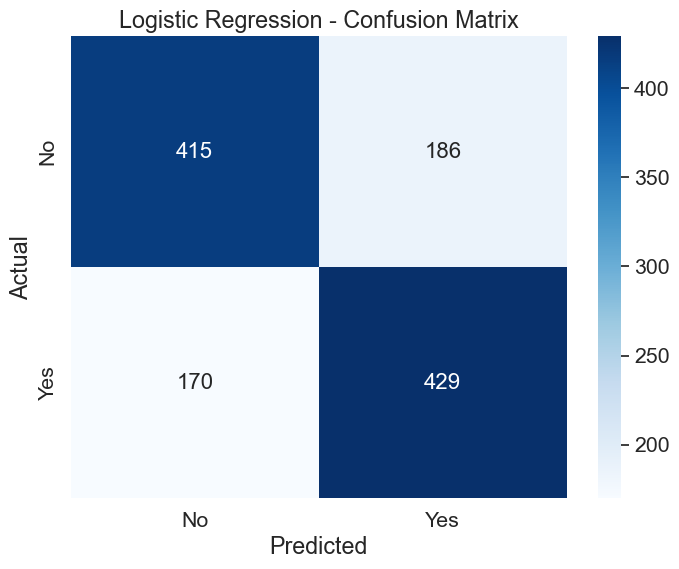

In [90]:
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,6))
plt.title('Logistic Regression - Confusion Matrix')
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

Printing the **classificatio**n report for the Logistic Regression

In [91]:
logistic_regression_cr = classification_report(y_test, y_pred_logit)
print (logistic_regression_cr)

              precision    recall  f1-score   support

          No       0.71      0.69      0.70       601
         Yes       0.70      0.72      0.71       599

    accuracy                           0.70      1200
   macro avg       0.70      0.70      0.70      1200
weighted avg       0.70      0.70      0.70      1200



<div style="background-color: lightgreen; padding: 10px; font-weight: bold; font-size: 20px">
6. K-MEANS (CLUSTERING)
</div>

Importing libraries for K-Means

In [92]:
# data visualization
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

### Plot 18 - Distortion Score Elbow for KMeans Clustering

Determining the optimal number of clusters using the **Elbow method**. With elbow method the objective is to find **k** where SSE decreases most rapidly. Therefore, from figure it can be seen that the optimal number of clusters is **4**. This is different from the actual number of classes in the dataset

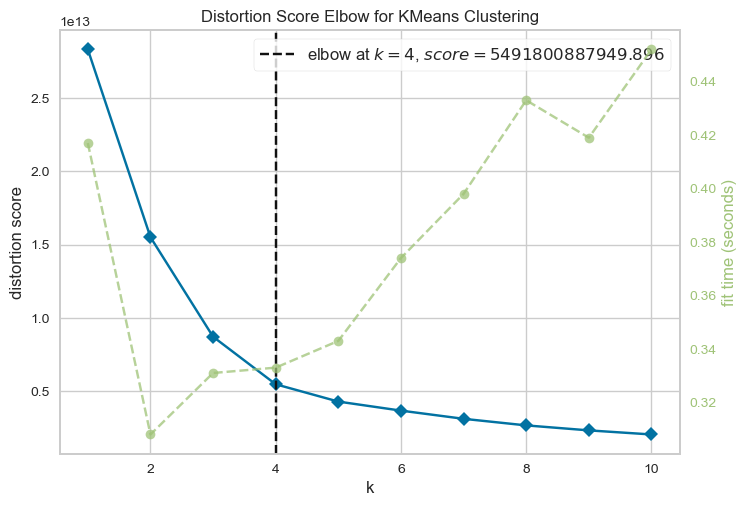

In [93]:
# Instantiate the clustering model and visualizer
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(X) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

Perform K-Means clustering using sklearn

In [94]:
# instatiate KMeans class and set the number of clusters
km_model = KMeans(n_clusters=4, random_state=15)

# call fit method with data 
km = km_model.fit_predict(X)

# coordinates of cluster center
centroids = km_model.cluster_centers_ 

# cluster label for each data point
labels = km_model.labels_ 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Plot 19 - Clusters Visualization

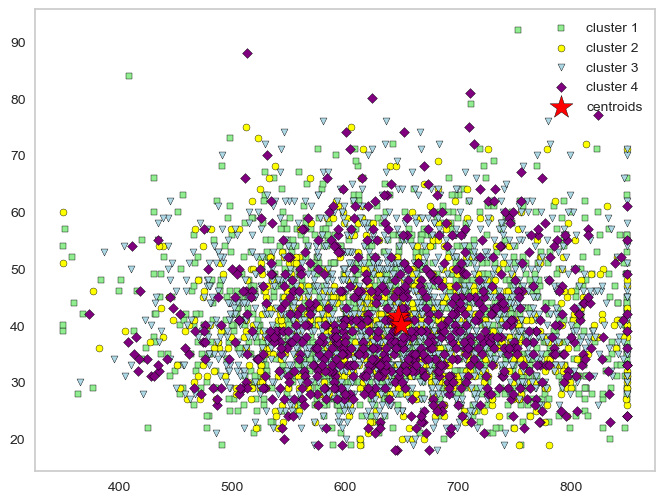

In [95]:
plt.figure(figsize=(8,6))

plt.scatter(
    X[km == 0, 0], X[km == 0, 1],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[km == 1, 0], X[km == 1, 1],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[km == 2, 0], X[km == 2, 1],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X[km == 3, 0], X[km == 3, 1],
    s=25, c='purple',
    marker='D', edgecolor='black',
    label='cluster 4'
)

# Visualize centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

**Computing Purity Score**

Purity score is computed using Ground Truth or External accessment. Since, the dataset consists of a true class label, the accuracy of the cluster label computed using KMeans is compared against the true label class

In [96]:
def purity_score(y_true, y_pred_kmeans):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred_kmeans)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score
purity = purity_score(y, labels)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 56.7%


#### Kmeans using pyclustering for different Distance Metrics
- Here, K-Means is performed using pyclustering library for various distance metrics like Manhattan, Chebyshev, euclidean etc.
- Minkowski distance is just the generalisation of euclidean (p=2), manhattan (p=1) and chebyshev distance (p=Inf).
- Although for pyclustering, initial centers can be initialised using k++ algorithm, but, I have randomly initialised the - initial center to compare the results with sklearn kmeans.
- Highest purity is achieved using Chi-Square as the distance metric.

In [97]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 4, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")

The purity score for euclidean distance is 56.72%
The purity score for squared euclidean distance is 56.72%
The purity score for manhattan distance is 56.72%
The purity score for chebyshev distance is 56.72%
The purity score for canberra distance is 55.58%
The purity score for chi-square distance is 57.0%


Combining 5-Fold Cross Validation Average Accuracy values for each model and storing them inside a dataframe called **cv**

In [98]:
#creating the dictionary
cv = {
    "Model": ["KNN", "Naive Bayes", "Linear SVM", "RBF SVM", "Poly SVM", "Sig SVM", "Decision Tree", "Random Forest", "Logistic Regression"],
    "Avg Accuracy": [0.7232142857142857, 0.7075, 0.6992857142857143, 0.7049999999999998, 0.7510714285714285, 0.5796428571428571, 0.6846428571428571, 0.7646428571428572, 0.6971428571428572]
}

#Converting it to a pandas dataframe
cv = pd.DataFrame(cv)

print(cv)

                 Model  Avg Accuracy
0                  KNN      0.723214
1          Naive Bayes      0.707500
2           Linear SVM      0.699286
3              RBF SVM      0.705000
4             Poly SVM      0.751071
5              Sig SVM      0.579643
6        Decision Tree      0.684643
7        Random Forest      0.764643
8  Logistic Regression      0.697143


### Plot 20 - 5-Fold Cross Validation Average Accuracy for Different Models

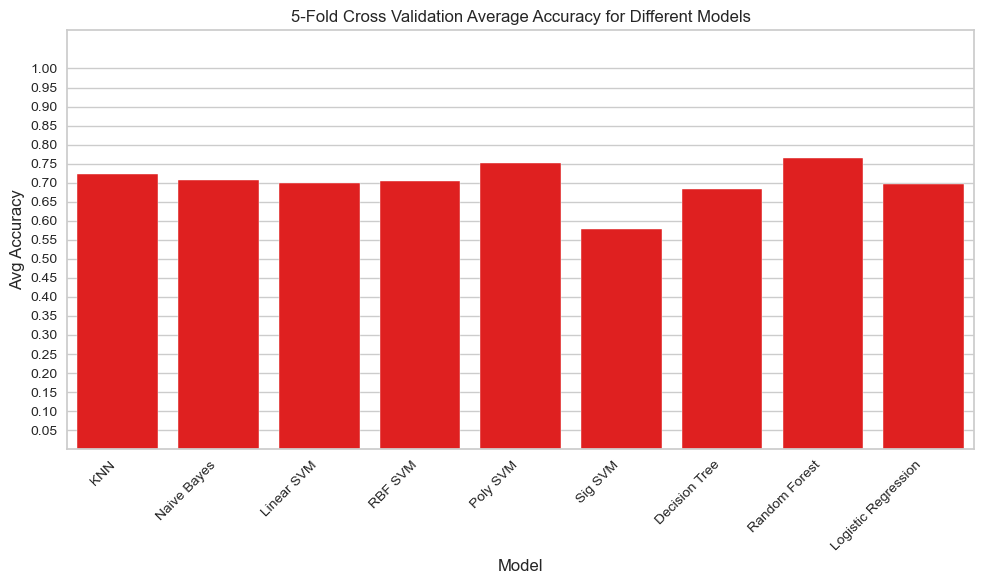

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Avg Accuracy", data=cv, color="red")
plt.xlabel('Model')
plt.ylabel('Avg Accuracy')
plt.title('5-Fold Cross Validation Average Accuracy for Different Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.ylim(0, 1.1)

# Set y-axis ticks at specific intervals (0.05, 0.1, 0.15, ...)
plt.yticks([i/20 for i in range(1, 21)])  # Range starts from 1 to avoid tick at 0

plt.tight_layout()
plt.show()

Plotting the **weighted average** of the various metrix (**accuracy**, **precision**, **recall**, **f1**) for the different models. Since it is the one with the highest accuracy score, I use the Polynomial Kernel as SVM Model to compare with the other Machine Learning Models.

###  Plot 21 - Model vs Weighted Avg Of Various Metrics

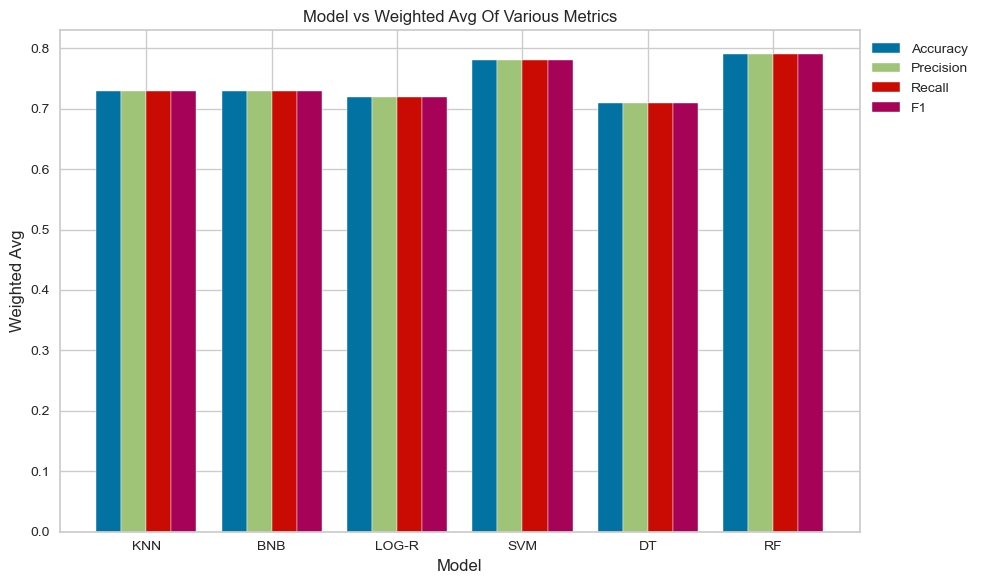

In [100]:
# Models
X = ['KNN', 'BNB', 'LOG-R', 'SVM', 'DT', 'RF']

# Collect this information from the classification reports and store them in lists
accuracy = [0.73, 0.73, 0.72, 0.78, 0.71, 0.79]
precision = [0.73, 0.73, 0.72, 0.78, 0.71, 0.79]
recall = [0.73, 0.73, 0.72, 0.78, 0.71, 0.79]
f1 = [0.73, 0.73, 0.72, 0.78, 0.71, 0.79]

# Number of bars
n_bars = len(X)

# Number of groups of bars (accuracy, precision, recall, f1)
n_groups = 4

# Total width for each group of bars
total_width = 0.8

# Width for each individual bar within a group
bar_width = total_width / n_groups

# Calculate the center positions for each group of bars
X_axis = np.arange(len(X))

# Calculate the left positions for each individual bar within a group
left_positions = X_axis - (total_width - bar_width) / 2

# Setting the size of the graph
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

# Plotting the bars for each metric using the left positions and respective data
ax.bar(left_positions, accuracy, bar_width, label='Accuracy')
ax.bar(left_positions + bar_width, precision, bar_width, label='Precision')
ax.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
ax.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')

# Setting the range of values for the X axis and labels
ax.set_xticks(X_axis)
ax.set_xticklabels(X)
ax.set_xlabel("Model")
ax.set_ylabel("Weighted Avg")
ax.set_title("Model vs Weighted Avg Of Various Metrics")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Legend on the right

plt.tight_layout()  # Ensures labels and titles are properly displayed
plt.show()

<div style="background-color: lightgreen; padding: 10px; font-weight: bold; font-size: 20px">
EXTRACTING PICKLES
</div>

Extracting pickels for the **Random Rorest** classifier (Best Performer) and for the scaler.

In [101]:
import pickle

# Saving the trained model and the scaler to files
with open('p1_model.pkl', 'wb') as f:
    pickle.dump(rf, f)
with open('p2_scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

<div style="background-color: lightgreen; padding: 10px; font-weight: bold; font-size: 20px">
MODEL DEPLOYMENT
</div>

# https://asciorilli.pythonanywhere.com/Bank_Customer_Churn_Prediction